<a href="https://colab.research.google.com/github/gpariente/Cloud-Computing/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install requests beautifulsoup4


In [21]:
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

In [22]:
import re

def save_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    return words

In [23]:
def remove_stop_words(words):
    # print(words)
    # stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
    # for stop_word in stop_words:
    #     if stop_word in words:
    #         del words[stop_word]
    # return words


    stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
    words = [word for word in words if word.lower() not in stop_words]
    return words

In [24]:
from nltk.stem import PorterStemmer

def apply_stemming(words):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word in words:
        stemmed_word = stemmer.stem(word)
        #if stemmed_word in stemmed_index:
         #   stemmed_index[stemmed_word] += count
        #else:
         #   stemmed_index[stemmed_word] = count
    return stemmed_index

In [25]:
def search(query, words):

    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    print(query)
    results = {}
    for word in query_words:
        word = stemmer.stem(word)
        if word in words:
            results[word] = words[word]
    return results

In [26]:
def searchInAllURLS(soup,url,word):
  results = []
  stemmer = PorterStemmer()
  word = stemmer.stem(word)
  print("Visiting "+ url)
  a_links = soup.select('a')
  for link in a_links:
    if ('https' in link['href']) or ('http' in link['href']):
      if 'salesforce.com/uk/' in link['href'] or 'salesforce.com/eu/' in link['href'] or 'salesforce.com/uk/':
        print ("Nested Link: " + link['href'])
        soup = fetch_page(link['href'])
        if soup is None:
          return None
        all_words = save_words(soup)
        all_words = remove_stop_words(all_words)
        all_words = apply_stemming(all_words)
        if word in all_words:
          results[word] += link['href']
        searchInAllURLS(soup,link['href'],word)

    else:
      print("NOT GOOD LINK")
  return results



In [27]:
def search_engine(url, query):
    soup = fetch_page(url)
    if soup is None:
        return None
    all_words = save_words(soup)
    all_words = remove_stop_words(all_words)
    all_words = apply_stemming(all_words)
    results = search(query, all_words)
    return results

In [9]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def scrape_website(base_url, search_words, max_depth):
    visited_links = set()
    links_with_search_words = {word: set() for word in search_words}
    word_occurrences = {word: 0 for word in search_words}
    word_index = {word: [] for word in search_words}

    def recursive_scrape(url, current_depth):
        nonlocal word_occurrences
        if url in visited_links or current_depth > max_depth:
            return
        if 'salesforce.com/eu/' not in url or '#' in url:
            return
        print("URL:", url, "Depth:", current_depth)

        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')


            text = soup.get_text().lower()
            for word in search_words:
                if word.lower() in text:
                    print(f"Found the word '{word}' in {url}")
                    links_with_search_words[word].add(url)
                    word_occurrences[word] += 1
                    word_index[word].append(url)

            visited_links.add(url)


            a_links = soup.select('a')
            for link in a_links:
                if ('https' in url) or ('http' in url):
                    if 'salesforce.com/eu/' in url:
                        linked = urljoin(url, link['href'])
                        recursive_scrape(linked, current_depth + 1)
        except Exception as e:
            print(f"Error processing {url}: {str(e)}")

    recursive_scrape(base_url, 0)

    return links_with_search_words, word_occurrences, word_index

base_url = 'https://www.salesforce.com/eu/'
search_words = ['SaaS', 'IaaS', 'PaaS', 'CRM', 'Data', 'Integration', 'ERP', 'API', 'Security', 'Analytics', 'Scalability']
max_depth = 2  # Maximum depth for recursion - We limit it to 2 because otherwise it takes a lot of time

links_with_search_words, word_occurrences, word_index = scrape_website(base_url, search_words, max_depth)

# Output
for word in search_words:
    print(f"\nLinks containing the word '{word}':")
    for link in links_with_search_words[word]:
        print(link)
    print(f"Occurrences of '{word}': {word_occurrences[word]}")
    print(f"Index for '{word}': {word_index[word]}")


URL: https://www.salesforce.com/eu/ Depth: 0
Found the word 'CRM' in https://www.salesforce.com/eu/
URL: https://www.salesforce.com/eu/form/signup/freetrial-sales-starter/?d=pb Depth: 1
Found the word 'Data' in https://www.salesforce.com/eu/form/signup/freetrial-sales-starter/?d=pb
URL: https://www.salesforce.com/eu/form/starter/overview-demo/?d=pb Depth: 1
Found the word 'CRM' in https://www.salesforce.com/eu/form/starter/overview-demo/?d=pb
Found the word 'Data' in https://www.salesforce.com/eu/form/starter/overview-demo/?d=pb
URL: https://www.salesforce.com/eu/company/privacy/ Depth: 2
Found the word 'CRM' in https://www.salesforce.com/eu/company/privacy/
Found the word 'Data' in https://www.salesforce.com/eu/company/privacy/
Found the word 'Integration' in https://www.salesforce.com/eu/company/privacy/
Found the word 'Security' in https://www.salesforce.com/eu/company/privacy/
Found the word 'Analytics' in https://www.salesforce.com/eu/company/privacy/
URL: https://www.salesforce.c

In [15]:
def save_to_firebase(word_index):
    firebase_url = 'https://tut6-d79ae-default-rtdb.europe-west1.firebasedatabase.app/'

    for word, links in word_index.items():
        data = {'links': list(links)}
        firebase_endpoint = f'{firebase_url}/word_index/{word}.json'
        response = requests.put(firebase_endpoint, json=data)
        if response.status_code == 200:
            print(f"Data for '{word}' successfully written to Firebase.")
        else:
            print(f"Failed to write data for '{word}' to Firebase. Status Code: {response.status_code}")

save_to_firebase(word_index)

Data for 'SaaS' successfully written to Firebase.
Data for 'IaaS' successfully written to Firebase.
Data for 'PaaS' successfully written to Firebase.
Data for 'CRM' successfully written to Firebase.
Data for 'Data' successfully written to Firebase.
Data for 'Integration' successfully written to Firebase.
Data for 'ERP' successfully written to Firebase.
Data for 'API' successfully written to Firebase.
Data for 'Security' successfully written to Firebase.
Data for 'Analytics' successfully written to Firebase.
Data for 'Scalability' successfully written to Firebase.


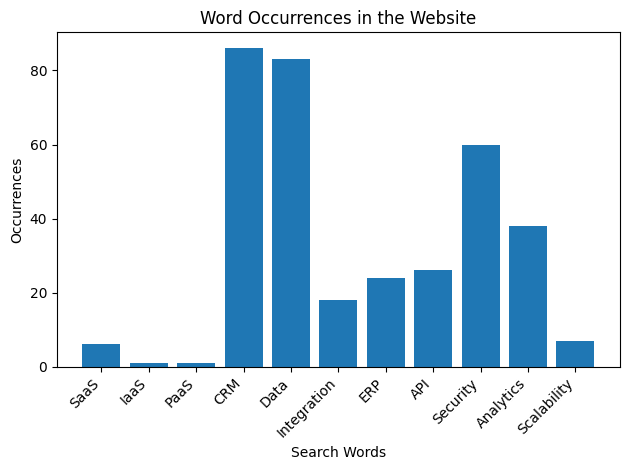

In [13]:
import matplotlib.pyplot as plt


# Plot bar chart for words
plt.bar(search_words, [word_occurrences[word] for word in search_words])
plt.xlabel('Search Words')
plt.ylabel('Occurrences')
plt.title('Word Occurrences in the Website')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
